## 1 导包 ##

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from scipy.stats import mode

## 2 数据导入和预处理 ##

2.1 数据导入

In [32]:
# 导入csv文件
file_path = './dataset/DataSet.csv' 
data = pd.read_csv(file_path)
data

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,in_balanced_dataset
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"<h3>We're Food52, and we've created a groundbr...","<p>Food52, a fast-growing, James Beard Award-w...",<ul>\r\n<li>Experience with content management...,NaN,f,t,f,Other,Internship,NaN,NaN,Marketing,f,f
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"<h3>90 Seconds, the worlds Cloud Video Product...",<p>Organised - Focused - Vibrant - Awesome!<br...,<p><b>What we expect from you:</b></p>\r\n<p>Y...,<h3><b>What you will get from us</b></h3>\r\n<...,f,t,f,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,f,f
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,<h3></h3>\r\n<p>Valor Services provides Workfo...,"<p>Our client, located in Houston, is actively...",<ul>\r\n<li>Implement pre-commissioning and co...,NaN,f,t,f,NaN,NaN,NaN,NaN,NaN,f,f
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,<p>Our passion for improving quality of life t...,<p><b>THE COMPANY: ESRI – Environmental System...,<ul>\r\n<li>\r\n<b>EDUCATION: </b>Bachelor’s o...,<p>Our culture is anything but corporate—we ha...,f,t,f,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,f,f
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,<p>SpotSource Solutions LLC is a Global Human ...,<p><b>JOB TITLE:</b> Itemization Review Manage...,<p><b>QUALIFICATIONS:</b></p>\r\n<ul>\r\n<li>R...,<p>Full Benefits Offered</p>,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,f,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,<p>Vend is looking for some awesome new talent...,<p>Just in case this is the first time you’ve ...,<p>To ace this role you:</p>\r\n<ul>\r\n<li>Wi...,<p><b>What can you expect from us?</b></p>\r\n...,f,t,t,Full-time,Mid-Senior level,NaN,Computer Software,Sales,f,f
17876,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,<p>WebLinc is the e-commerce platform and serv...,<p></p>\r\n<p>The Payroll Accountant will focu...,<p></p>\r\n<p>- B.A. or B.S. in Accounting</p>...,<p></p>\r\n<h3>Health &amp; Wellness</h3>\r\n<...,f,t,t,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,f,f
17877,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,<p>We Provide Full Time Permanent Positions fo...,<p>Experienced Project Cost Control Staff Engi...,<ul>\r\n<li>At least 12 years professional exp...,NaN,f,f,f,Full-time,NaN,NaN,NaN,NaN,f,f
17878,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,<p>Nemsia Studios is looking for an experience...,<p>1. Must be fluent in the latest versions of...,<p>Competitive salary (compensation will be ba...,f,f,t,Contract,Not Applicable,Professional,Graphic Design,Design,f,f


2.2 数据预处理

在机器学习和数据分析中，平衡的数据集是指各个类别或标签之间样本数量相对均衡的数据集。换句话说，每个类别的样本数量差异不大。

选择平衡的数据集是为了避免数据不平衡问题带来的偏差。数据不平衡指的是某些类别的样本数量明显少于其他类别，这可能导致模型在训练过程中对样本较多的类别更加敏感，而对样本较少的类别表现不佳。

以下是一些选择平衡数据集的原因：

1.避免偏斜：数据不平衡可能导致模型在预测时对多数类别进行过度优化，而忽略少数类别。通过选择平衡的数据集，可以更好地训练模型以准确预测各个类别。

2.提高性能评估：在不平衡的数据集上评估模型的性能可能会导致误导。例如，在一个有99%负例和1%正例的二分类问题中，即使模型总是预测为负例，也会有99%的准确率。但是这种情况下，模型对于正例的预测性能实际上是很差的。通过选择平衡的数据集，可以更准确地评估模型的性能。

3.提高模型训练效果：平衡的数据集可以帮助模型更好地学习各个类别之间的特征和模式，从而提高模型的训练效果和泛化能力。

当数据集存在明显的不平衡时，可以采取一些方法来处理数据不平衡问题，如欠采样、过采样、生成合成样本等。选择平衡的数据集是处理数据不平衡问题的一种常见策略之一。

In [33]:
# 2.2.1 删除非平衡记录
print(data.shape,"\n")
data = data[data['in_balanced_dataset'] == 't']
print(data.shape)
del data['in_balanced_dataset']

(17880, 18) 

(900, 18)


In [34]:
# 2.2.2数据映射
# f映射为0，t映射为1
data['telecommuting']=data['telecommuting'].map({'f':0,'t':1})
data['has_company_logo']=data['has_company_logo'].map({'f':0,'t':1})
data['has_questions']=data['has_questions'].map({'f':0,'t':1})
data['fraudulent']=data['fraudulent'].map({'f':0,'t':1})

C:\Users\10690\AppData\Local\Temp\ipykernel_14256\3875214607.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['telecommuting']=data['telecommuting'].map({'f':0,'t':1})
C:\Users\10690\AppData\Local\Temp\ipykernel_14256\3875214607.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['has_company_logo']=data['has_company_logo'].map({'f':0,'t':1})
C:\Users\10690\AppData\Local\Temp\ipykernel_14256\3875214607.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [35]:
# 2.2.1空值填充
# 空值填充分两类，string空值用unknown填充，binary用众数填充

# 使用众数填充binary类型的空值
integer_columns = ['telecommuting', 'has_company_logo', 'has_questions', 'fraudulent']
for column in integer_columns:
    mode_value = data[column].mode()[0]  # 计算众数
    data[column].fillna(mode_value, inplace=True)  # 使用众数填充空值

print(data.isnull().sum())

# 使用 'unknown' 填充string类型的空值
data.fillna('unkonwn', inplace=True)

print(data.isnull().sum())

title                    0
location                23
department             617
salary_range           732
company_profile        475
description              0
requirements           174
benefits               348
telecommuting            0
has_company_logo         0
has_questions            0
employment_type        262
required_experience    400
required_education     480
industry               319
function               378
fraudulent               0
dtype: int64
title                  0
location               0
department             0
salary_range           0
company_profile        0
description            0
requirements           0
benefits               0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64


C:\Users\10690\AppData\Local\Temp\ipykernel_14256\1210305702.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column].fillna(mode_value, inplace=True)  # 使用众数填充空值
C:\Users\10690\AppData\Local\Temp\ipykernel_14256\1210305702.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.fillna('unkonwn', inplace=True)


In [36]:
# 2.2.2 去重
print(data.shape,"\n")
data.drop_duplicates(inplace=True)
print(data.shape)

(900, 17) 

(894, 17)


C:\Users\10690\AppData\Local\Temp\ipykernel_14256\2213045178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [37]:
# 2.2.4 Html字符串处理

html_label = ['company_profile' ,'description' ,'requirements' ,'benefits']

print(data['company_profile'].iloc[323])

# 使用apply函数处理每个单元格
for column in html_label:
    data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text(strip=True))

print(data['company_profile'].iloc[323])
   

<p>Populist Cleaning Co. is an independently owned, full-service commercial cleaning company.  Populist has been providing janitorial services to Southeast Michigan since 1980 and was founded on one simple idea: <i>offer our customers the best possible service, quality, and value.</i></p>
<p>As a growing company, we are looking for exceptional people who share our love for the customers we serve and the work we do!</p>
<p>When you work for Populist, you’ll enjoy flexible hours, a friendly atmosphere, and competitive pay.  You’ll also be a part of a team that is committed to supporting your career goals.  All necessary training will be provided.</p>
<p>The ideal candidate is dedicated to providing outstanding customer service every day.</p>


C:\Users\10690\AppData\Local\Temp\ipykernel_14256\1165671990.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[column] = data[column].apply(lambda x: BeautifulSoup(x, 'html.parser').get_text(strip=True))


Populist Cleaning Co. is an independently owned, full-service commercial cleaning company.  Populist has been providing janitorial services to Southeast Michigan since 1980 and was founded on one simple idea:offer our customers the best possible service, quality, and value.As a growing company, we are looking for exceptional people who share our love for the customers we serve and the work we do!When you work for Populist, you’ll enjoy flexible hours, a friendly atmosphere, and competitive pay.  You’ll also be a part of a team that is committed to supporting your career goals.  All necessary training will be provided.The ideal candidate is dedicated to providing outstanding customer service every day.


## 3 模型训练

In [42]:
#3.1 对html字符串采用词云图
data['html_text']=(data['company_profile']+' '+data['description']+' '+data['requirements']
              +' '+data['benefits'])

#分离真实工作和虚假工作
fraudjobs_text = data[data.fraudulent==1].html_text
actualjobs_text = data[data.fraudulent==0].html_text


C:\Users\10690\AppData\Local\Temp\ipykernel_14256\2259552639.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['html_text']=(data['company_profile']+' '+data['description']+' '+data['requirements']


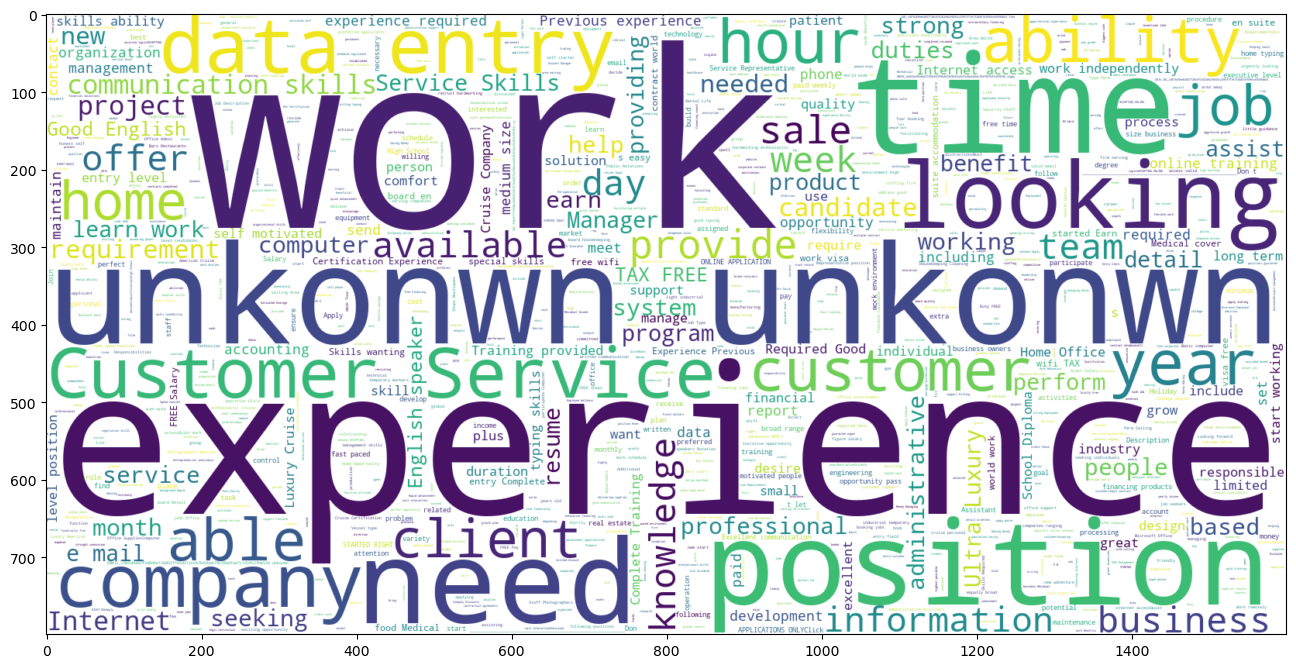

In [43]:
#3.1.1 Fraudulent jobs word cloud
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS,background_color='white').generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear', cmap='viridis')

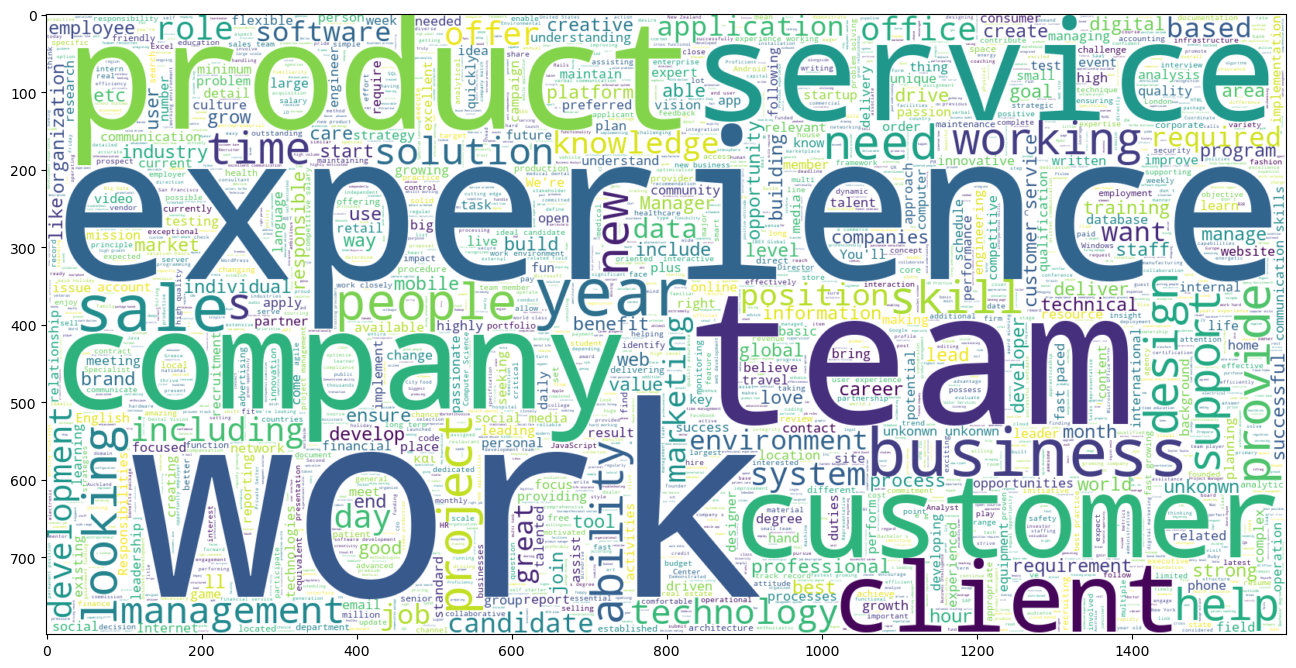

In [44]:
#3.1.2 真实工作词云
plt.figure(figsize = (16,14))
wc = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS,background_color='white').generate(str(" ".join(actualjobs_text)))
plt.imshow(wc,interpolation = 'bilinear', cmap='viridis')

In [ ]:
del data['html_text']